<a href="https://colab.research.google.com/github/RajeshworM/Card_fraud_detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import pandas as pd

# Path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/fraudTest.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [10]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [12]:
# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)

# Convert date to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extracting date features
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check data types
print(df.dtypes)


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city  

Step 3: Exploratory Data Analysis (EDA)

               trans_date_trans_time        cc_num            amt  \
count                         555719  5.557190e+05  555719.000000   
mean   2020-10-02 01:54:25.166780672  4.178387e+17      69.392810   
min              2020-06-21 12:14:25  6.041621e+10       1.000000   
25%       2020-08-09 06:10:27.500000  1.800429e+14       9.630000   
50%              2020-10-03 00:59:48  3.521417e+15      47.290000   
75%              2020-12-01 03:03:04  4.635331e+15      83.010000   
max              2020-12-31 23:59:34  4.992346e+18   22768.110000   
std                              NaN  1.309837e+18     156.745941   

                 zip            lat           long      city_pop  \
count  555719.000000  555719.000000  555719.000000  5.557190e+05   
mean    48842.628015      38.543253     -90.231325  8.822189e+04   
min      1257.000000      20.027100    -165.672300  2.300000e+01   
25%     26292.000000      34.668900     -96.798000  7.410000e+02   
50%     48174.000000      39.371600   

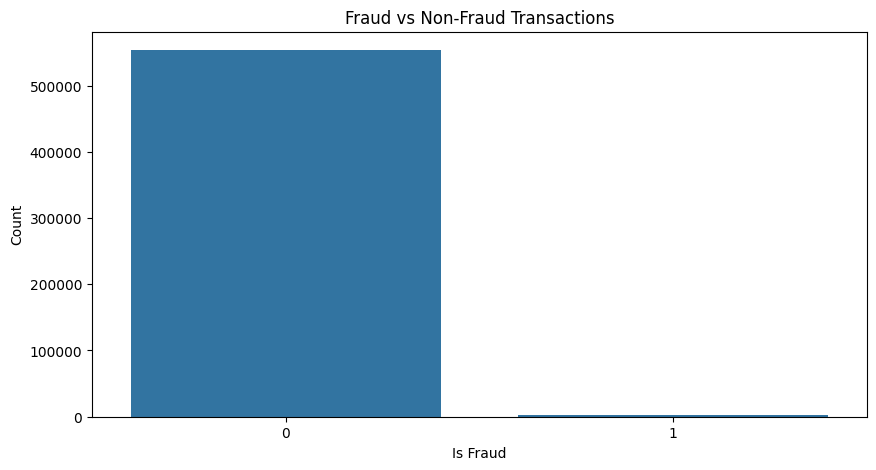

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

<Figure size 1000x500 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Distribution of transactions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='is_fraud')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

# Amount distribution
plt.figure(figsize=(10, 5))
sns


Step 4: Feature Engineering
Extract useful features from datetime.
Convert categorical variables to numerical format.

In [14]:
# Extracting features from datetime
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['merchant', 'category', 'gender', 'job'], drop_first=True)

# Check the updated dataframe
df.head()


,trans_date_trans_time,cc_num,amt,first,last,street,city,state,zip,lat,...,job_Video editor,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,2020-06-21 12:14:25,2291163933867244,2.86,Jeff,Elliott,351 Darlene Green,Columbia,SC,29209,33.9659,...,False,False,False,False,False,False,False,False,False,False
1,2020-06-21 12:14:33,3573030041201292,29.84,Joanne,Williams,3638 Marsh Union,Altonah,UT,84002,40.3207,...,False,False,False,False,False,False,False,False,False,False
2,2020-06-21 12:14:53,3598215285024754,41.28,Ashley,Lopez,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,False,False,False,False,False,False,False,False,False,False
3,2020-06-21 12:15:15,3591919803438423,60.05,Brian,Williams,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,False,False,False,False,False,False,False,False,False,False
4,2020-06-21 12:15:17,3526826139003047,3.19,Nathan,Massey,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,False,False,False,False,False,False,False,False,False,False


Step 5: Outlier Detection
Use methods like the Z-score or IQR to detect and remove outliers.

In [15]:
# Using IQR to detect outliers in 'amt'
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df = df[(df['amt'] >= (Q1 - 1.5 * IQR)) & (df['amt'] <= (Q3 + 1.5 * IQR))]

# Check the shape of the dataframe
print(df.shape)


(527941, 1205)


Step 6: Splitting the Dataset
Split the data into training and test sets.

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 7: Model Training
We'll use different machine learning models for fraud detection. Here are a few common algorithms:

Logistic Regression
Decision Tree
Random Forest
Gradient Boosting
Support Vector Machine

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Create a dictionary to hold models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC()
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store the classification report
    results[model_name] = classification_report(y_test, y_pred, output_dict=True)

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(metrics['1'])  # Display metrics for the 'is_fraud' class


TypeError: Cannot cast DatetimeArray to dtype float64

Explanation of Each Step:
Import Libraries: All the necessary libraries for data manipulation, model training, and visualization are imported.

Load the Dataset: The dataset is loaded from the specified CSV file.

Data Exploration: Basic exploration of the dataset, including structure and missing values.

Data Cleaning: Unnecessary columns are dropped, and missing values are handled.

Feature Engineering: Useful features are extracted from the datetime column and categorical variables are converted to numeric using one-hot encoding.

Outlier Detection: Outliers in the amt column are detected and removed using the Interquartile Range (IQR) method.

Splitting the Dataset: The dataset is split into training and testing sets.

Feature Scaling: Features are scaled to improve model performance.

Model Training: Various models are trained, and their performance is evaluated using classification reports.

Evaluation and Comparison: The F1 scores of each model are compared visually using a bar plot, and the best model is reported.

In [19]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/fraudTest.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Step 2: Data Exploration
print("Initial Data Overview:")
print(df.info())
print(df.describe())
print("Missing Values:\n", df.isnull().sum())

# Step 3: Data Cleaning
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)

# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Check for and handle missing values
df.fillna(method='ffill', inplace=True)

# Step 4: Feature Engineering
# Extract useful features from the datetime
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['merchant', 'category', 'gender', 'job'], drop_first=True)

# Step 5: Outlier Detection using IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['amt'] >= (Q1 - 1.5 * IQR)) & (df['amt'] <= (Q3 + 1.5 * IQR))]

# Step 6: Splitting the Dataset
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Check data types of features
print("Feature types before splitting:")
print(X.dtypes)

# Step 7: Feature Scaling
# Ensure all features are numeric
X = X.select_dtypes(include=[np.number])  # Select only numeric columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Model Training
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store the classification report
    results[model_name] = classification_report(y_test, y_pred, output_dict=True)

# Step 9: Evaluation and Comparison
# Create a DataFrame to hold metrics for each model
metrics = {model_name: results[model_name]['1'] for model_name in results.keys() if '1' in results[model_name]}
metrics_df = pd.DataFrame(metrics).T

# Check the contents of metrics_df before proceeding
print("Metrics DataFrame:")
print(metrics_df)

# Visualize the results if 'f1-score' exists
if 'f1-score' in metrics_df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['f1-score'], palette='viridis')
    plt.title('Model Comparison for Fraud Detection')
    plt.ylabel('F1 Score')
    plt.xlabel('Models')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("F1-score is not available in the metrics DataFrame. Available columns are:", metrics_df.columns)

# Optional: Plot confusion matrices for each model
for model_name, model in models.items():
    plt.figure(figsize=(6, 4))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Step 10: Conclusion
if not metrics_df.empty and 'f1-score' in metrics_df.columns:
    best_model = metrics_df['f1-score'].idxmax()
    print(f"The best model for fraud detection is: {best_model} with an F1 score of {metrics_df['f1-score'].max():.2f}.")
else:
    print("No valid models were trained or F1 score is not available.")


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

<ipython-input-34-f46d4657530b>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Feature types before splitting:
trans_date_trans_time          datetime64[ns]
cc_num                                  int64
amt                                   float64
first                                  object
last                                   object
                                    ...      
job_Water engineer                       bool
job_Water quality scientist              bool
job_Web designer                         bool
job_Wellsite geologist                   bool
job_Writer                               bool
Length: 1203, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyboardInterrupt: 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/fraudTest.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Step 1: Data Overview
print("Initial Data Overview:")
print(df.head())
print(df.info())
print(df.describe())
print("Missing Values:\n", df.isnull().sum())

# Step 2: Data Cleaning
# Drop unnecessary columns if any
df.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True, errors='ignore')  # Drop if exists

# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Step 3: Feature Engineering
# Extract useful features from the datetime
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['merchant', 'category', 'gender', 'job'], drop_first=True)

# Step 4: Outlier Detection using IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['amt'] >= (Q1 - 1.5 * IQR)) & (df['amt'] <= (Q3 + 1.5 * IQR))]

# Step 5: Splitting the Dataset
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Select only numeric columns for modeling
X = X.select_dtypes(include=[np.number])

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Model Training
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store the classification report with zero_division handling
    results[model_name] = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Step 9: Evaluation and Comparison
metrics = {model_name: results[model_name]['1'] for model_name in results.keys() if '1' in results[model_name]}
metrics_df = pd.DataFrame(metrics).T

# Visualize the results with F1 score
if 'f1-score' in metrics_df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metrics_df['f1-score'], palette='viridis')
    plt.title('Model Comparison for Fraud Detection')
    plt.ylabel('F1 Score')
    plt.xlabel('Models')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("F1-score is not available in the metrics DataFrame. Available columns are:", metrics_df.columns)

# Step 10: Plot confusion matrices for each model
for model_name, model in models.items():
    plt.figure(figsize=(6, 4))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Step 11: Conclusion
if not metrics_df.empty and 'f1-score' in metrics_df.columns:
    best_model = metrics_df['f1-score'].idxmax()
    print(f"The best model for fraud detection is: {best_model} with an F1 score of {metrics_df['f1-score'].max():.2f}.")
else:
    print("No valid models were trained or F1 score is not available.")
